**1. kP (Tasa de Producción):**

Qué es: Representa la tasa constante de producción o entrada del componente que estamos modelando (en este caso "cocos").

Unidades: [Cantidad]/[Tiempo] (ej: cocos/hora, moléculas/minuto, etc.)

Función: Determina cuánto aumenta la cantidad de "cocos" por unidad de tiempo independientemente del valor actual de X.

Ejemplo biológico: Podría representar:

Tasa de reproducción en una población

Tasa de síntesis de una proteína

Tasa de ingreso de nutrientes a un sistema

**2. kD (Tasa de Degradación/Decaimiento):**

Qué es: Representa la tasa de pérdida o degradación proporcional a la cantidad presente de X.

Unidades: 1/[Tiempo] (ej: 1/hora, 1/minuto)

Función: Determina cuán rápido disminuye la cantidad de "cocos" en proporción a la cantidad existente.

Ejemplo biológico: Podría representar:

Tasa de mortalidad en una población

Tasa de degradación de una molécula

Tasa de consumo de recursos

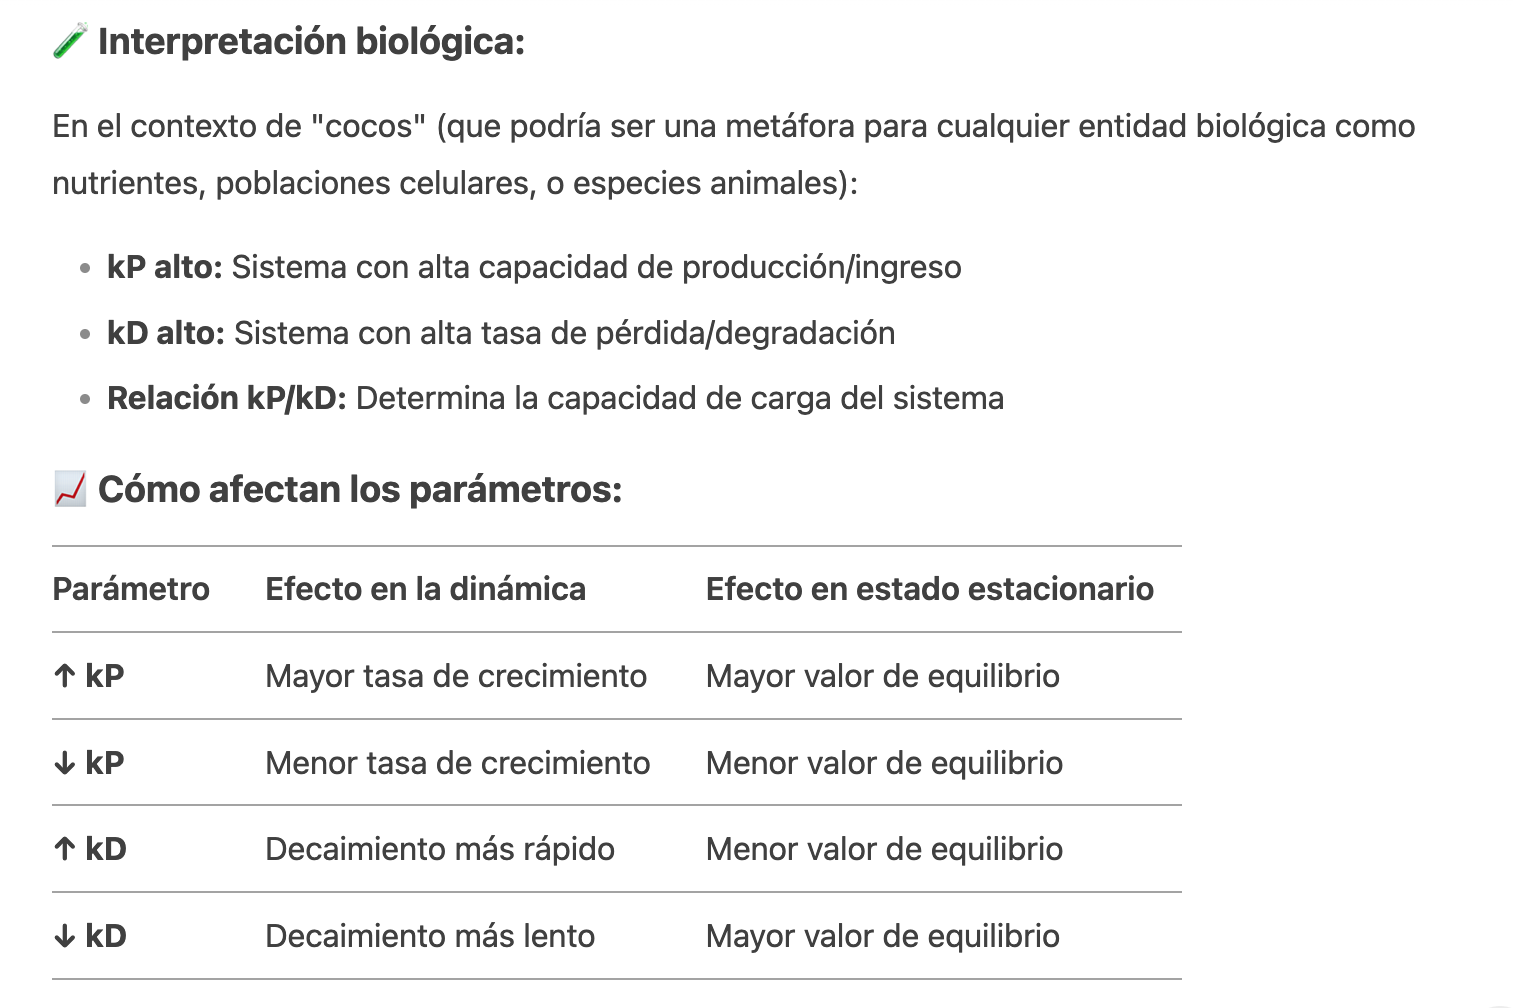

**Extrapolación:**

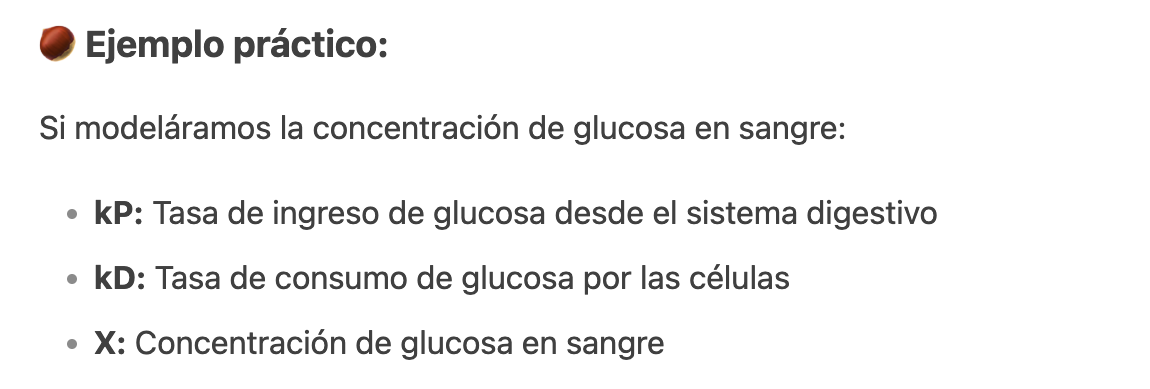

In [11]:
# pip install numpy matplotlib scipy ipywidgets ipympl
# jupyter nbextension enable --py widgetsnbextension

# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets
%matplotlib widget

# Define the ODE system
def cocos(t, X, kP, kD):
    dXdt = kP - X * kD 
    return dXdt 

# Solve the ODE numerically with the given parameters
def solve_ode(kP, kD, x0, t_span=(0, 10), t_eval=np.linspace(0, 10, 1001)):
    sol = solve_ivp(cocos, t_span, [x0], args=(kP, kD), t_eval=t_eval) 
    return sol.y[0]

# Main plotting function with interactive capabilities 
def interactive_plot(kP=5.0, kD=7.0, x0=1.0, num_simulations=50): 
    plt.close('all') # Close all previous plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) 
    
    # Time grid for plotting
    t_eval = np.linspace(0, 10, 1001) 
    
    # Plot nominal solution 
    nominal_solution = solve_ode(kP, kD, x0, t_eval=t_eval) 
    ax1.plot(t_eval, nominal_solution, 'r', lw=3, label='Nominal') 
    
    # Monte Carlo simulations 
    final_values = [] 
    for _ in range(num_simulations): 
        # Sample parameters from normal distribution
        kP_sim = np.random.normal(kP, 1) 
        kD_sim = np.random.normal(kD, 1) 
        x0_sim = np.random.normal(x0, 1)
        
        # Solve and plot the simulation
        sim_solution = solve_ode(kP_sim, kD_sim, x0_sim, t_eval=t_eval)
        ax1.plot(t_eval, sim_solution, 'grey', alpha=0.4)
        final_values.append(sim_solution[-1])
    
    # Plot formatting 
    ax1.set_xlabel('Time') 
    ax1.set_ylabel('x(t)')
    ax1.set_title('System Trajectories')
    ax1.grid(True)
    ax1.legend()
    
    # Plot histogram of final values
    ax2.hist(final_values, bins=20, density=True, color='skyblue', 
            edgecolor='black', alpha=0.7)
    ax2.axvline(kP/kD, color='r', linestyle='--', lw=2, 
               label=f'Steady State: {kP/kD:.2f}')
    ax2.set_xlabel('x(t=10)')
    ax2.set_ylabel('Density')
    ax2.set_title('Final Value Distribution')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets 
kP_slider = FloatSlider(value=5, min=0, max=10, step=0.1, description='kP:') 
kD_slider = FloatSlider(value=7, min=0, max=10, step=0.1, description='kD:')
x0_slider = FloatSlider(value=1, min=0, max=5, step=0.1, description='x0:')
sim_slider = IntSlider(value=50, min=10, max=200, step=10, description='Simulations:')

# Set up the interactive interface 
ui = widgets.VBox([kP_slider, kD_slider, x0_slider, sim_slider])
out = widgets.interactive_output(interactive_plot, {
    'kP': kP_slider, 
    'kD': kD_slider, 
    'x0': x0_slider, 
    'num_simulations': sim_slider
})

display(ui, out)

Output()